In [17]:
# Import and configuration
import chart_config
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from config import *

In [7]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path)
incident_data.head()

,Year,City/County,State Name,Number of Killed,Number of Injured,Incident Info,Latitude,Longitude,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type,State Abbr
0,2013,Mckeesport,Pennsylvania,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,PA
1,2013,Hawthorne,California,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,CA
2,2013,Lorain,Ohio,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,OH
3,2013,Aurora,Colorado,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,CO
4,2013,Greensboro,North Carolina,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,NC


## Total Incidents per State

In [28]:
state_groups = incident_data.groupby('State Name')
state_data = pd.concat([
    state_groups['State Name'].count().rename('Number of Incidents'),
    state_groups['Number of Killed'].sum().rename('Number of Killed'),
    state_groups['Number of Injured'].sum().rename('Number of Injured')], axis=1).sort_values('Number of Incidents', ascending=True).reset_index()
state_data.head()

,State Name,Number of Incidents,Number of Killed,Number of Injured
0,Hawaii,289,63,85
1,Vermont,472,57,73
2,Wyoming,494,73,52
3,South Dakota,544,90,114
4,North Dakota,573,69,130


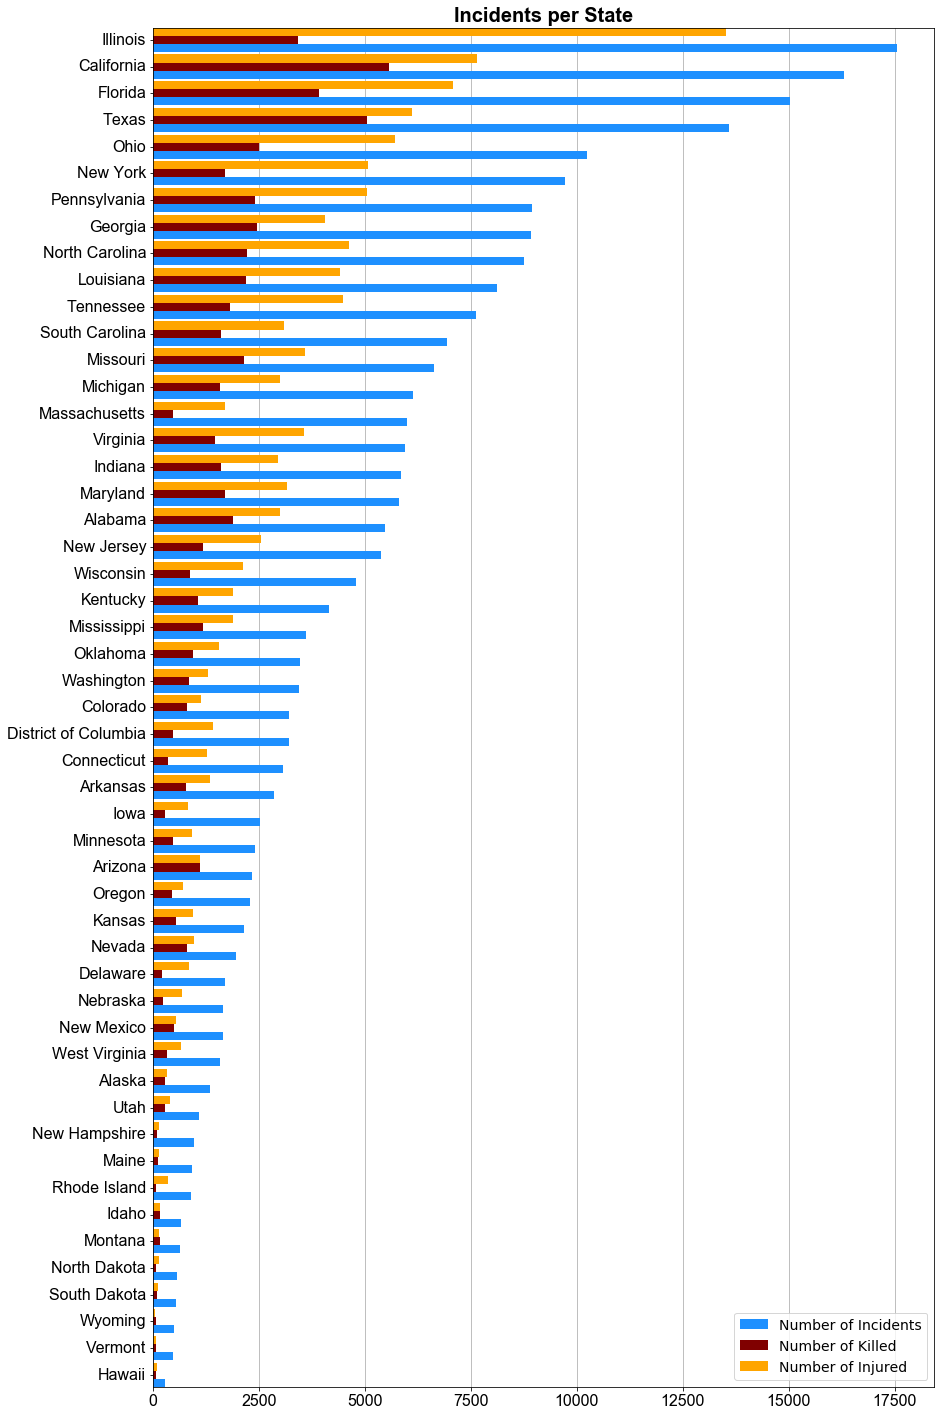

In [30]:
bar_width = 0.3
fig,ax = plt.subplots(figsize=(14,25))
n_inc = ax.barh(state_data.index, state_data['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(state_data.index + bar_width, state_data['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(state_data.index + 2 * bar_width, state_data['Number of Injured'], bar_width, color='orange')
ax.set_title('Incidents per State', fontdict=chart_config.title_font)
ax.set_yticks(state_data.index + bar_width)
ax.set_yticklabels(state_data['State Name'],fontdict=chart_config.axis_font, va='center')
ax.set_xticklabels([2500 * i for i in range(0,8)], fontdict=chart_config.axis_font)
ax.set_ylim(-0.15, 50.75)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('../Output/Incidents per State.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

## Top 20 Most Dangerous Cities

In [48]:
city_groups = incident_data.groupby(['State Abbr','City/County'])
city_data = pd.concat([
    city_groups['State Abbr'].count().rename('Number of Incidents'),
    city_groups['Number of Killed'].sum().rename('Number of Killed'),
    city_groups['Number of Injured'].sum().rename('Number of Injured')], axis=1).sort_values('Number of Incidents', ascending=True).reset_index()
city_data['City'] = city_data['City/County'] + ', ' + city_data['State Abbr']
city_data = city_data.drop(columns=['State Abbr', 'City/County']).loc[:,['City', 'Number of Incidents', 'Number of Killed', 'Number of Injured']]
city_data = city_data.sort_values('Number of Incidents', ascending=False)
city_data.head()

,City,Number of Incidents,Number of Killed,Number of Injured
17534,"Chicago, IL",10814,2104,10427
17533,"Baltimore, MD",3943,1055,2427
17532,"New Orleans, LA",3070,703,1892
17531,"Philadelphia, PA",2929,890,2318
17530,"Saint Louis, MO",2498,916,1782


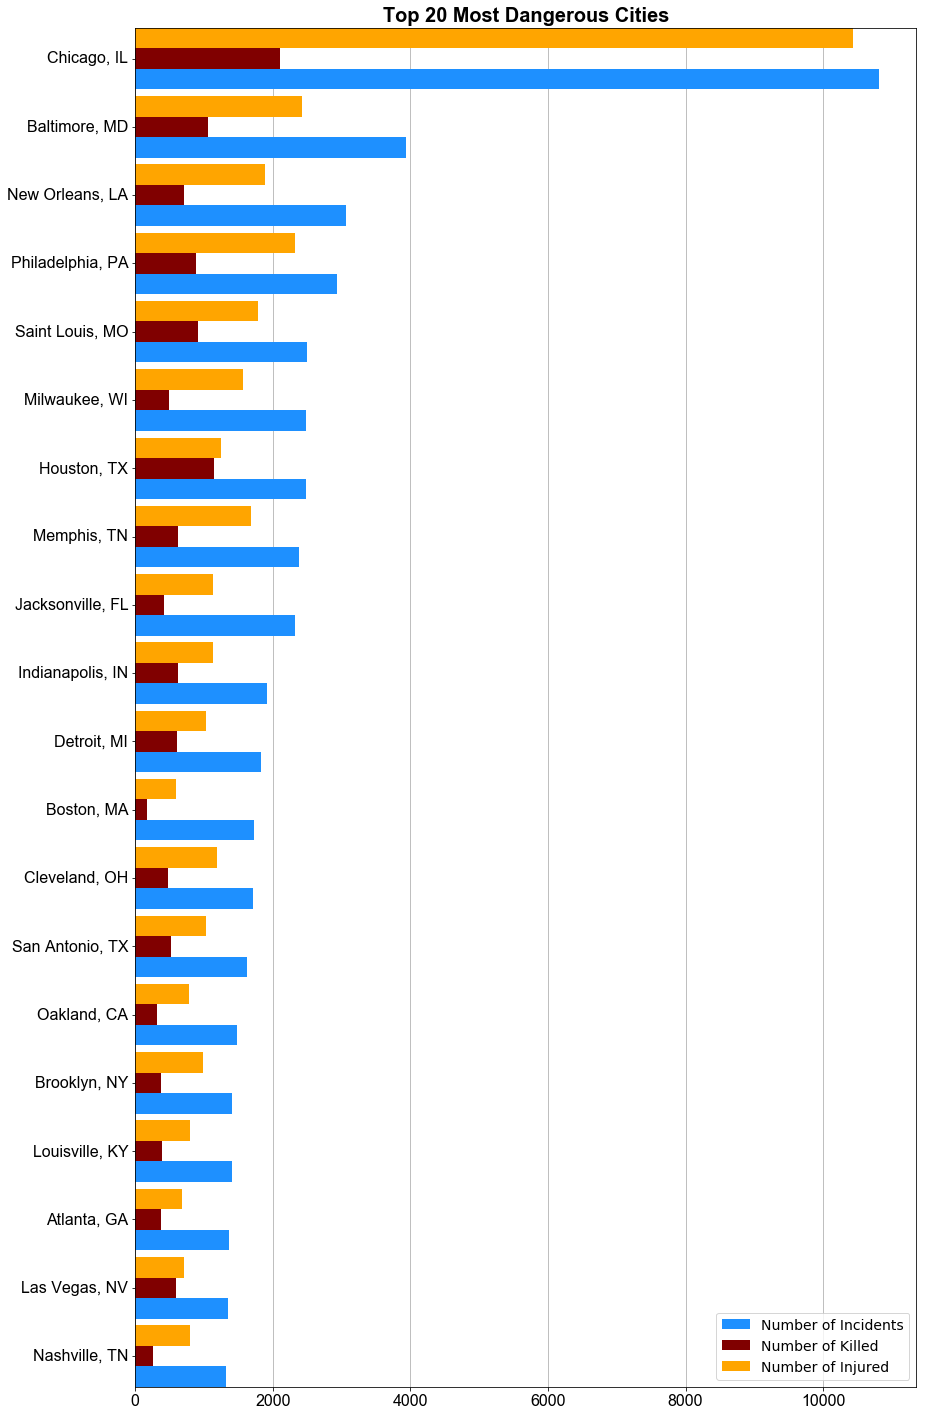

In [54]:
bar_width = 0.3
top_city_data = city_data.head(20).sort_values('Number of Incidents').reset_index(drop=True)
fig,ax = plt.subplots(figsize=(14,25))
n_inc = ax.barh(top_city_data.index, top_city_data['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(top_city_data.index + bar_width, top_city_data['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(top_city_data.index + 2 * bar_width, top_city_data['Number of Injured'], bar_width, color='orange')
ax.set_title('Top 20 Most Dangerous Cities', fontdict=chart_config.title_font)
ax.set_yticks(top_city_data.index + bar_width)
ax.set_yticklabels(top_city_data['City'],fontdict=chart_config.axis_font, va='center')
ax.set_xticklabels([2000 * i for i in range(0,7)], fontdict=chart_config.axis_font)
ax.set_ylim(-0.15, 19.75)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('../Output/Top 20 Most Dangerous Cities.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()